# 3.4 Relationships Between Quantitative and Categorical Variables

In this section, we discuss ways to visualize the relationship between a categorical variable, like the building type of a home, and a quanitative variable, like the sale price.

In [ ]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_ames = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")
df_ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


One way is to visualize the conditional distributions of the quantitative variable, given the value of the categorical variable. In order to do this, we have to first determine the possible values of the categorical variable.

In [ ]:
df_ames["Bldg Type"].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

Now, we can make a histogram of the sale price for each building type, by repeatedly subsetting the data set.

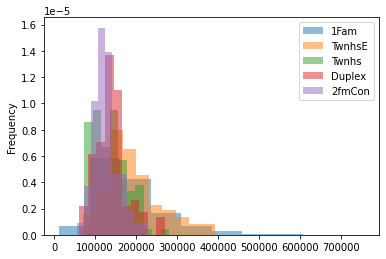

In [ ]:
for bldg_type in df_ames["Bldg Type"].unique():
    df_ames[df_ames["Bldg Type"] == bldg_type]["SalePrice"].plot.hist(
        label=bldg_type,
        density=True,
        alpha=0.5,
        legend=True
    )

A density plot is less busy and may make it easier to compare the distributions of sale price for different building types.

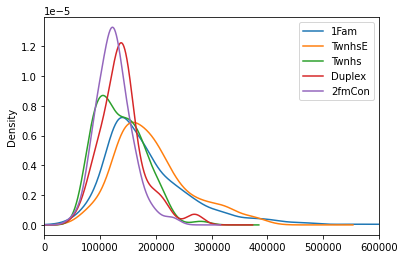

In [ ]:
for bldg_type in df_ames["Bldg Type"].unique():
    df_ames[df_ames["Bldg Type"] == bldg_type]["SalePrice"].plot.density(
        label=bldg_type,
        legend=True,
        xlim=(0, 600000)
    )

If we only need to know the center of each distribution, we can simply report the conditional mean for each building type. The conditional means can be visualized using a bar chart. We manually construct the `pandas` `Series` for making the bar chart.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


1Fam      184812.041237
TwnhsE    192311.914163
Twnhs     135934.059406
Duplex    139808.935780
2fmCon    125581.709677
dtype: float64

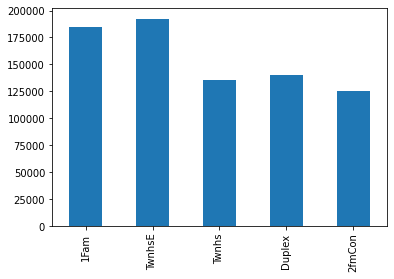

In [ ]:
mean_sale_price = pd.Series()

for bldg_type in df_ames["Bldg Type"].unique():
    mean_sale_price[bldg_type] = df_ames[df_ames["Bldg Type"] == bldg_type]["SalePrice"].mean()
    
mean_sale_price.plot.bar()
mean_sale_price

However, this code is inefficient and repetitive. In this lesson, we will learn a framework for concisely specifying analyses like the one above.

## Split-Apply-Combine Strategy

The problem of calculating the average sale price for each building type is an example of a problem that can be solved using the _split-apply-combine strategy_. The key insight here is that many data analyses follow the same basic pattern:

- First, a data set is _split_ into several subsets based on some variable.
- Next, some analysis is _applied_ to each subset.
- Finally, the results from each analysis are _combined_.

The three steps are diagrammed in the figure below:

![](https://github.com/dlsun/pods/blob/master/03-Quantitative-Data/split_apply_combine.png?raw=1) [source](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb)

Applying this strategy to the working example above, we should first _split_ up the Ames data according to the building type, _apply_ the mean sale price to each subset, and finally _combine_ the results into one `Series`.

[_Note:_ The term "split-apply-combine" was coined by Hadley Wickham in [a 2011 paper](https://www.jstatsoft.org/article/view/v040i01), but the idea is not new. It should already be familiar to you if you know SQL or MapReduce.]

## Split-Apply-Combine in `pandas`: the `.groupby()` method

To implement the split-apply-combine strategy in `pandas`, we use the `.groupby()` method. First, we specify one or more variables to split on in the argument to `.groupby()`. Then, we specify our analysis as usual. Pandas will handle splitting the data, applying the analysis to each subset, and combining the results at the end.

For example, to make the histograms of sale price for each building type, we can `.groupby` the building type and plot as usual. Note that we do not need to specify the labels; `pandas` will automatically use the different building types as the labels.

Bldg Type
1Fam      AxesSubplot(0.125,0.125;0.775x0.755)
2fmCon    AxesSubplot(0.125,0.125;0.775x0.755)
Duplex    AxesSubplot(0.125,0.125;0.775x0.755)
Twnhs     AxesSubplot(0.125,0.125;0.775x0.755)
TwnhsE    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalePrice, dtype: object

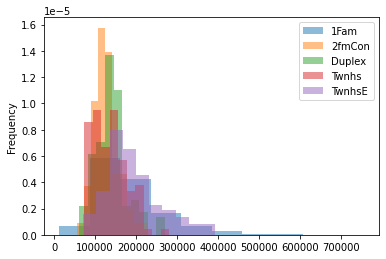

In [ ]:
df_ames.groupby("Bldg Type")["SalePrice"].plot.hist(
        density=True,
        alpha=0.5,
        legend=True
    )

Compare this line of code with the code to plot a histogram of **SalePrice**:

`df_ames["SalePrice"].plot.hist(...)`.

The only difference is `.groupby("Bldg Type")`. This turns a `DataFrame` into a `DataFrameGroupBy` object, which behaves like a `DataFrame`, except that any analysis that we specify will be applied to every subset of the `DataFrame` instead of the whole `DataFrame`.

Similarly, to calculate the average sale price for each building type, we can `.groupby` the building type and calculate the mean as usual.

In [ ]:
df_ames.groupby("Bldg Type")["SalePrice"].mean()

Bldg Type
1Fam      184812.041237
2fmCon    125581.709677
Duplex    139808.935780
Twnhs     135934.059406
TwnhsE    192311.914163
Name: SalePrice, dtype: float64

This automatically returned the desired `Series` that we can pass to `.plot.bar()`.

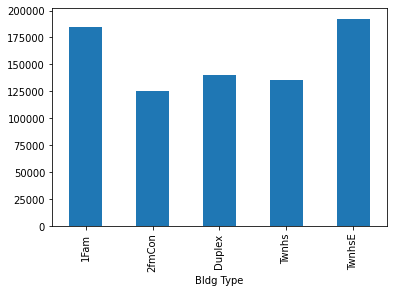

In [ ]:
df_ames.groupby("Bldg Type")["SalePrice"].mean().plot.bar()

It is also possible to group by more than one variable. Simply pass in a list of variable names to `.groupby()`. For example, the following code calculates the average sale price by building type and house style.

In [ ]:
df_ames.groupby(["Bldg Type", "House Style"])["SalePrice"].mean()

Bldg Type  House Style
1Fam       1.5Fin         138115.384083
           1.5Unf         109200.000000
           1Story         177180.062193
           2.5Fin         222857.142857
           2.5Unf         187305.555556
           2Story         224026.618777
           SFoyer         149841.666667
           SLvl           167996.708333
2fmCon     1.5Fin         127750.000000
           1.5Unf         118000.000000
           1Story         132046.312500
           2.5Fin         200000.000000
           2.5Unf         128350.000000
           2Story         112259.722222
           SFoyer         127000.000000
           SLvl           140000.000000
Duplex     1.5Fin         138680.000000
           1Story         125522.929825
           2.5Unf         183450.000000
           2Story         157909.440000
           SFoyer         154938.473684
           SLvl           132500.000000
Twnhs      1.5Fin         148400.000000
           1Story         177578.947368
           2Story

Notice that when we use `.groupby()`, the resulting index is whatever variable(s) we grouped by. Since we grouped by two variables, this index actually has two levels. An index with more than one level is called a `MultiIndex` in `pandas`. To access a particular row in a `DataFrame` that is indexed by a `MultiIndex`, we pass in a tuple of the values we want from each level.

In [ ]:
df_ames.groupby(["Bldg Type", "House Style"])["SalePrice"].mean()[
    ("1Fam", "2Story")
]

224026.6187766714

# Exercises

Exercises 1-5 work with the Tips data set (`https://dlsun.github.io/pods/data/tips.csv`).

In [ ]:
data_dir = "https://dlsun.github.io/pods/data/"
df_tips = pd.read_csv(data_dir + "tips.csv")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1\. On which day of the week does the waiter serve the largest parties, on average?

In [ ]:
df_tips.groupby("day")["size"].mean()

day
Fri     2.105263
Sat     2.517241
Sun     2.842105
Thur    2.451613
Name: size, dtype: float64

**The waiter serves the largest parties, on average, on Sundays.**

2\. Calculate the average bill by day and time. What day-time combination has the highest average bill?

In [ ]:
df_tips.groupby(["day", "time"])["total_bill"].mean()

day   time  
Fri   Dinner    19.663333
      Lunch     12.845714
Sat   Dinner    20.441379
Sun   Dinner    21.410000
Thur  Dinner    18.780000
      Lunch     17.664754
Name: total_bill, dtype: float64

**Sunday-Dinner has the highest average bill.**

3\. Extract the average bill for Friday lunch from the result of Exercise 2.

In [ ]:
df_tips.groupby(["day", "time"])["total_bill"].mean()[("Fri", "Lunch")]

12.845714285714285

4\. Make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?

sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip_percent, dtype: object

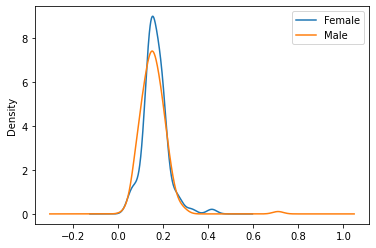

In [ ]:
df_tips["tip_percent"] = df_tips["tip"] / df_tips["total_bill"]
df_tips.groupby("sex")["tip_percent"].plot.density(legend=True)

**Both distributions are centered at nearly the same tip percentage.**

5\. Make a visualization that shows the average tip percentage as a function of table size.

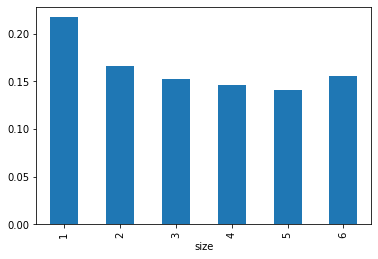

In [ ]:
df_tips.groupby("size")["tip_percent"].mean().plot.bar()